In [24]:
INT_MAX = 10000

# finds the orientation of 3 points,0 for collinear 1 for clockwise, 2 for counterclockwise

def orientation(p, q, r):
     
    val = (((q[1] - p[1]) *
            (r[0] - q[0])) -
           ((q[0] - p[0]) *
            (r[1] - q[1])))
            
    if val == 0:
        return 0 # Collinear
    if val > 0:
        return 1 # Clockwise
    else:
        return 2   #counterclockwise

def doIntersect(p1, q1, p2, q2):
     
    # Find the four orientations needed for 
    # general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
 
    # General case
    if (o1 != o2) and (o3 != o4):
        return True
 
    return False

def is_inside_polygon(points, p):
     
    n = len(points)
     
    # There must be at least 3 vertices
    # in polygon
    if n < 3:
        return False
         
    # Create a point for line segment
    # from p to infinite
    extreme = (INT_MAX, p[1])
    count = i = 0
     
    while True:
        next = (i + 1) % n
         
        # Check if the line segment from 'p' to 
        # 'extreme' intersects with the line 
        # segment from 'polygon[i]' to 'polygon[next]'
        if (doIntersect(points[i],points[next], p, extreme)):
                         
            count += 1
             
        i = next
         
        if (i == 0):
            break
         
    # Return true if count is odd, false otherwise
    return (count % 2 == 1)

In [35]:
import math
from matplotlib import pyplot as plt


def slope (a,b):
    if(a[0] == b[0]):
        return math.inf
    else:
        return ((b[1]-a[1])/(b[0]-a[0]))

#  returns array of y intercepts ( two nos ) of two new lines at the given distance given slope, distance and y itercept of parallel line
def find_intercept(m,c,d):
    temp = d*math.sqrt(1+m*m)
    to_return  = []
    to_return.append(c-temp)
    to_return.append(c+temp)
    return to_return

#  finds intersection point bw two lines
def intersection(m1,b1,m2,b2):
    xi = (b1-b2) / (m2-m1)
    yi = m1 * xi + b1

    return (xi,yi)

# finds the yintercept of a line given slope and a point on the line [ y = mx+ c]
def get_c(a,m):
    return (a[1] - m*a[0])

# find 4 points for each vertex intersection.
def find_candidates(m1,new_c1,m2,new_c2,vertices):
    to_return = []
    for i in new_c1:
        for j in new_c2:
            res = intersection(m1,i,m2,j)
            if(is_inside_polygon(vertices,res)):
                to_return.append(res)
    return to_return

#    find the vertices for the case when one of the slopes is undefined,acc to the formulae, y = c1+ mc2 , x = c2
def find_candidates_parallel(m,new_c1,new_c2,vertices):
    to_return = []
    for i in new_c1 :
        for j in new_c2:
            res = (j,(i + (m*j)))
            if(is_inside_polygon(vertices,res)):
                to_return.append(res)
    return to_return

# d = int(input("Enter the distace"))

# n = int(input("Enter the number of vertices"))
# vertices = []
# for i in range(n):
#     print("vertex no", i+1)
#     a = int(input("X axis:" ))
#     b = int(input("Y axis:"))
#     vertices.append((a,b))

#  test driver --------------------------------------------------------------------------------------------------
d = 10
n = 4
vertices = [(-10,50),(80,50),(80,-10),(-10,-10),(-5,30)]
# vertices = [(0,50),(60,50),(70,20),(-10,-20)]


# __________________________________________________________________________________________________________________

print("Original Vertices")
print(vertices)
result = []

for i in range(n):
    # iterator = (n-1 + i)%n
    a = vertices [i]
    b = vertices[(i + 1)%n]
    c = vertices[(i + 2)%n]


    m1 = slope(a,b)
    m2 = slope(b,c)

    # test for parallel ___________________________________________________________________________________________________

    if (m1 == math.inf):
        c_intercept =  b[0] 
        m = m2 
        new_c1 = [c_intercept-d,c_intercept+d]
        c2 = get_c(b,m2)
        new_c2 = find_intercept(m2,c2,d)
        final_point = find_candidates_parallel(m,new_c2,new_c1,vertices)
      
 #         ________________________________________________________________________________
#         ----------------------------------------------------------------------------------------

#         if (len(final_point) > 1):
#             parallel = None
#             perpendicular = None
#             for i in final_point:
#                 for j in final_point:
#                     if(i != j):
#                         alignment = slope(i,j)
#                         if (alignment == 0 and parallel== None):
#                             parallel = [i,j]
#                             break
#             for i in final_point:
#                 for j in final_point:
#                     if(i != j):
#                         alignment = slope(i,j)
#                         if (alignment == math.inf and perpendicular == None):
#                             perpendicular = [i,j]
#                             break
#             if (parallel and perpendicular):
                
#                 for i in parallel:
#                     for j in perpendicular:
#                         if (i == j):
#                             final_point = [i]
#         ----------------------------------------------------------------------------------------
#  _____________________________________________________________________________________________   
    elif(m2 == math.inf):
        c_intercept = b[0]
        m = m1
        c1 = get_c(b,m1)
        new_c1 = find_intercept(m1,c1,d)
        new_c2 = [c_intercept-d,c_intercept+d]
        final_point = find_candidates_parallel(m,new_c1,new_c2,vertices)
        
        #         ________________________________________________________________________________
#         ----------------------------------------------------------------------------------------
#         if (len(final_point) > 1):
#             parallel = None
#             perpendicular = None
#             for i in final_point:
#                 for j in final_point:
#                     if(i != j):
#                         alignment = slope(i,j)
#                         if (alignment == 0 and parallel== None):
#                             parallel = [i,j]
#                             break
#             for i in final_point:
#                 for j in final_point:
#                     if(i != j):
#                         alignment = slope(i,j)
#                         if (alignment == math.inf and perpendicular == None):
#                             perpendicular = [i,j]
#                             break
#             if (parallel and perpendicular):
                
#                 for i in parallel:
#                     for j in perpendicular:
#                         if (i == j):
#                             final_point = [i]

 #         ----------------------------------------------------------------------------------------
#  _____________________________________________________________________________________________   

    else:

        c1 = get_c(b,m1)
        c2 = get_c(b,m2)

        new_c1 = find_intercept(m1,c1,d)
        new_c2 = find_intercept(m2,c2,d)
        final_point = find_candidates(m1,new_c1,m2,new_c2,vertices)
        

        
            
    for i in final_point:
        result.append(i)
print("vertices of new polygon")
print(result)

Original Vertices
[(-10, 50), (80, 50), (80, -10), (-10, -10), (-5, 30)]
vertices of new polygon
[(70, 40.0), (70, 0.0), (0, 0.0), (0, 40.0)]


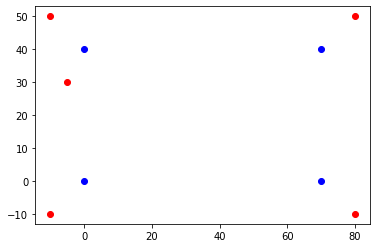

In [36]:
for i in range(len(vertices)):
    plt.scatter(vertices[i][0],vertices[i][1], color = 'red')
for i in range(len(result)):
    plt.scatter(result[i][0],result[i][1],color = 'blue')